In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import exposure

In [36]:
p = pd.read_csv('Substack-StraightWalk-1_1.csv')
x = p[p['Frame'] == 0].as_matrix()[:,2]
y = p[p['Frame'] == 0].as_matrix()[:,3]

(array([2.349575e+06, 2.200000e+01, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 4.830000e+02]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

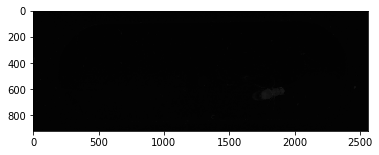

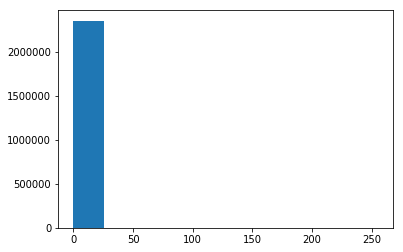

In [24]:
img = plt.imread('frames/001.jpg')[:,:,0]
plt.imshow(img, cmap='gray')
plt.figure()
plt.hist(img.flatten())

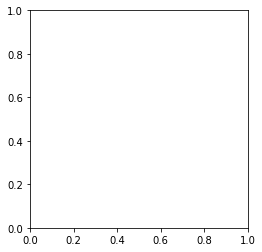

In [89]:
import matplotlib.animation as manimation
FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=10)


leg_indices = [23,24,25,26,  15,16,17,18, 7,8,9,10,  19,20,21,22,  11,12,13,14,  3,4,5,6]
leg = np.zeros((135, 38,2))
import numpy as np
fig = plt.figure()
with writer.saving(fig, "test.mp4", 100):
    for frame_idx in range(1,135):
        img = plt.imread('frames/{:03d}.jpg'.format(frame_idx))[:,:,0]
        p = pd.read_csv('Substack-StraightWalk-1_1.csv')
        x = p[p['Frame'] == frame_idx-1].as_matrix()[:,2]
        y = p[p['Frame'] == frame_idx-1].as_matrix()[:,3]
        
    
        bb = np.array([y[0]-200, y[0]+200, x[0]-200, x[0]+200]).astype(int)
        #print(bb)
        #print(img.shape)
        img = img[bb[0]:bb[1], :][:, bb[2]:bb[3]]
        #print(img.shape)
        x = x - (bb[2])
        y = y - bb[0]
        plt.imshow(img,cmap='gray')
        plt.scatter(x[leg_indices],y[leg_indices],c='red')

        #for i in range(x.shape[0]):
        #    plt.annotate(f'{i}', (x[i], y[i]))
        plt.gca().axis('off')
        writer.grab_frame()
        plt.cla()

In [101]:
import matplotlib.animation as manimation
FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=10)


leg_indices = [23,24,25,26,  15,16,17,18, 7,8,9,10,  19,20,21,22,  11,12,13,14,  3,4,5,6]
corr = [(0,1), (4,6), (8,11), (12,19+1), (16, 19 + 5 + 1), (20, 19+5+5+1)]
leg = np.zeros((135, 38,2))
import numpy as np
fig = plt.figure()
with writer.saving(fig, "test.mp4", 100):
    for frame_idx in range(1,136):
        img = plt.imread('frames/{:03d}.jpg'.format(frame_idx))[:,:,0]
        p = pd.read_csv('Substack-StraightWalk-1_1.csv')
        x = p[p['Frame'] == frame_idx-1].as_matrix()[:,2]
        y = p[p['Frame'] == frame_idx-1].as_matrix()[:,3]
        
        for c_, c in corr:
            leg[frame_idx-1,c:c+4, 0] = x[c_:c_+4]
            leg[frame_idx-1,c:c+4, 1] = y[c_:c_+4]

In [104]:
leg[-1, 0:5]

array([[   0.       ,    0.       ],
       [2058.683941 ,  578.4799289],
       [1959.948595 ,  606.6487755],
       [2157.419286 ,  550.3110823],
       [2056.570354 ,  566.1626406]])

In [102]:
np.save('flylimbtracker', leg)

In [90]:
from IPython.display import Video
Video('test.mp4', embed=True)